In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
data=pd.read_csv(r"C:\Users\91950\Downloads\insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
# Check for missing values
data.isna().sum()

#no null values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Encode categorical variables
label_encoder = LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["smoker"] = label_encoder.fit_transform(data["smoker"])
data = pd.get_dummies(data, columns=["region"], drop_first=True)

C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


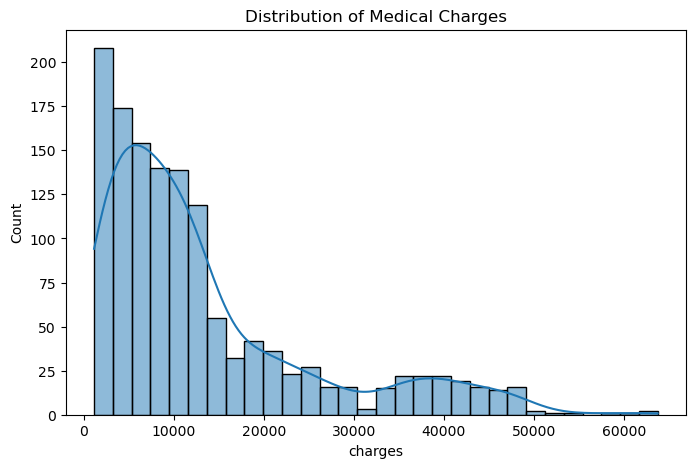

In [8]:
# Exploratory Data Analysis (EDA)

# Visualizing the distribution of charges
plt.figure(figsize=(8,5))
sns.histplot(data['charges'], bins=30, kde=True)
plt.title("Distribution of Medical Charges")
plt.show()
# The distribution is right-skewed, indicating a few individuals incur significantly high medical costs.

C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


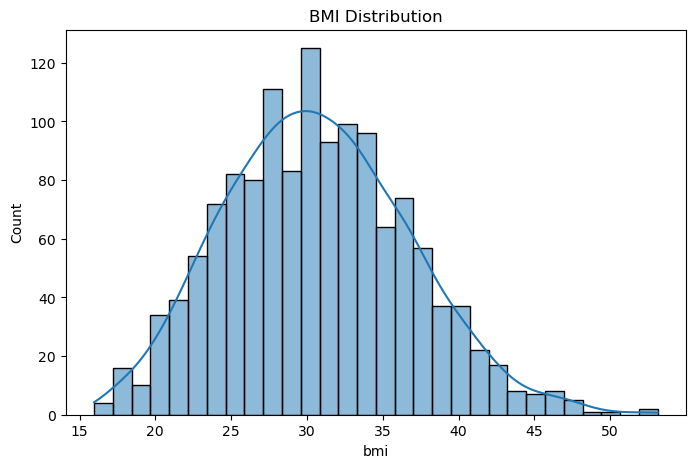

In [9]:
# Distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title("BMI Distribution")
plt.show()
# Most individuals have a BMI between 20-35, with outliers at the higher end indicating obesity

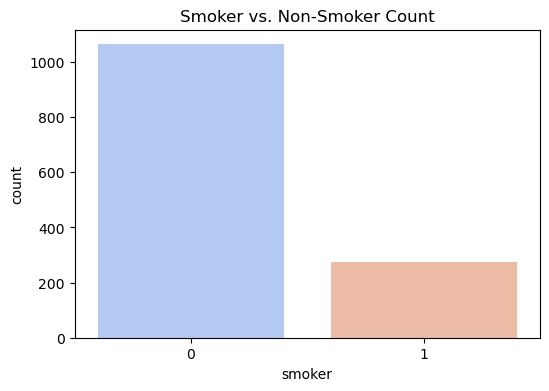

In [10]:
# Count of smokers vs. non-smokers
plt.figure(figsize=(6,4))
sns.countplot(x='smoker', data=data, palette='coolwarm')
plt.title("Smoker vs. Non-Smoker Count")
plt.show()
# There are more non-smokers than smokers, but smokers tend to have significantly higher medical costs.

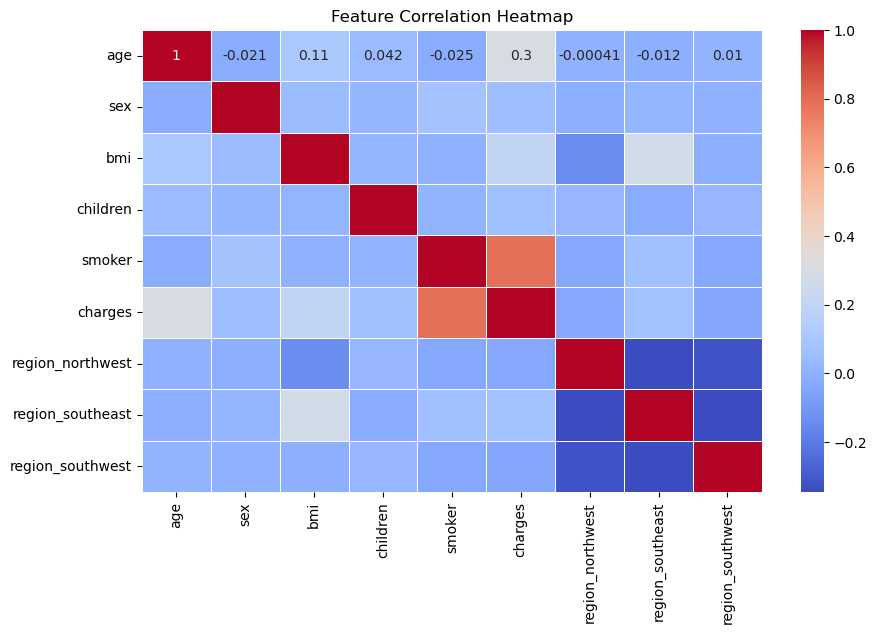

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# Smoking has the highest positive correlation with charges, followed by BMI and age.

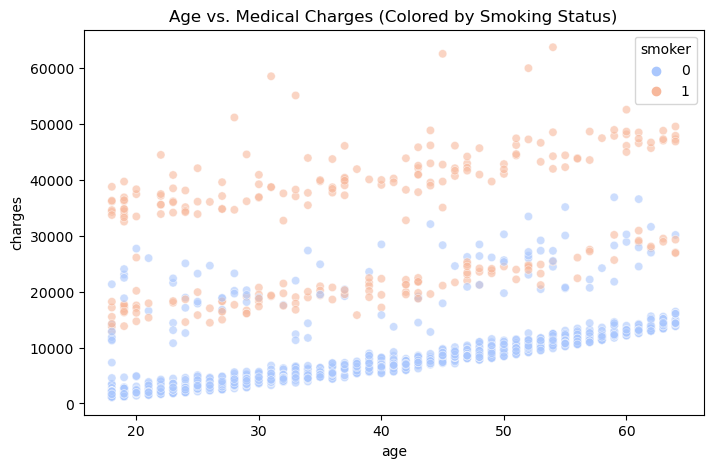

In [12]:
# Age vs. Medical Charges
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['age'], y=data['charges'], hue=data['smoker'], alpha=0.6, palette="coolwarm")
plt.title("Age vs. Medical Charges (Colored by Smoking Status)")
plt.show()
#Older individuals and smokers have significantly higher medical costs.

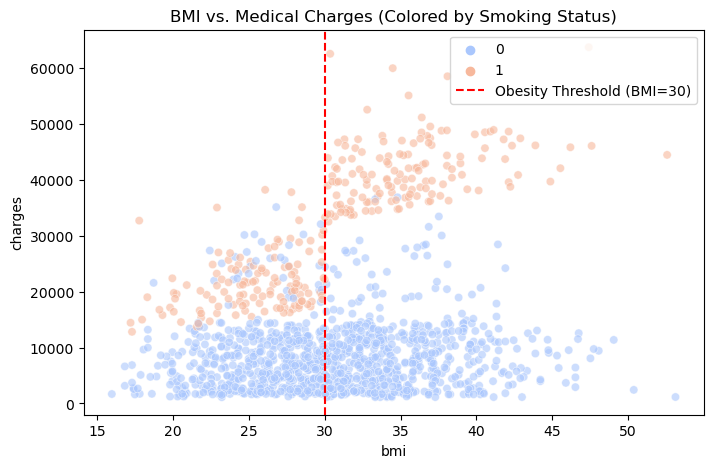

In [13]:
# BMI vs. Charges (Obesity Impact)
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'], alpha=0.6, palette="coolwarm")
plt.axvline(x=30, color='r', linestyle='--', label="Obesity Threshold (BMI=30)")
plt.title("BMI vs. Medical Charges (Colored by Smoking Status)")
plt.legend()
plt.show()
#BMI above 30 (obese) is associated with higher medical costs, especially for smokers.


C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\91950\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


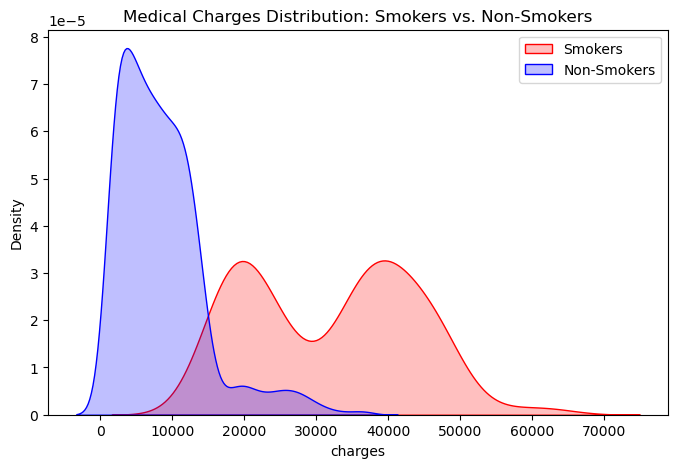

In [15]:
# Smoker vs. Non-Smoker Charges Distribution
plt.figure(figsize=(8,5))
sns.kdeplot(data[data['smoker']==1]['charges'], label="Smokers", fill=True, color="red")
sns.kdeplot(data[data['smoker']==0]['charges'], label="Non-Smokers", fill=True, color="blue")
plt.title("Medical Charges Distribution: Smokers vs. Non-Smokers")
plt.legend()
plt.show()
# Smokers consistently have significantly higher medical costs compared to non-smokers.

In [17]:
# Dropping unnecessary columns
data.drop(['sex'], axis=1, inplace=True)

In [18]:
# Splitting dataset
X = data.drop("charges", axis=1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature scaling
scaler = StandardScaler()
X_train[['age', 'bmi']] = scaler.fit_transform(X_train[['age', 'bmi']])
X_test[['age', 'bmi']] = scaler.transform(X_test[['age', 'bmi']])

In [46]:
#Train Multiple Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=400, max_depth=7, min_samples_split=12, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=15, weights='uniform', metric='manhattan'),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=600, learning_rate=0.008, max_depth=3, random_state=42)
}

In [47]:
best_model = None
best_r2 = 0

In [48]:
#evaluate Multiple models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R2 Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model = model

Linear Regression R2 Score: 0.7836
Random Forest R2 Score: 0.8731
KNN R2 Score: 0.6991
Gradient Boosting R2 Score: 0.8785


In [49]:
# Save the best model using Pickle
with open("best_insurance_model.pkl", "wb") as file:
    pickle.dump(best_model, file)

print(f"Best model saved: {best_model.__class__.__name__} with R2 Score {best_r2:.4f}")

Best model saved: GradientBoostingRegressor with R2 Score 0.8785
